In [1]:
import sympy as symp
import numpy as np
import matplotlib.pyplot as plt
import ODE as ODE

# 第三章作业补充
由于交上一次作业时间仓促，部分习题没来得及提交

# 第四章习题

1. 显式欧拉方法、预估校正欧拉方法得到的数值解与严格解如下，可以看到不同方法得到的解与严格解相近，并且预估-校正方法的误差明显小于显式欧拉方法

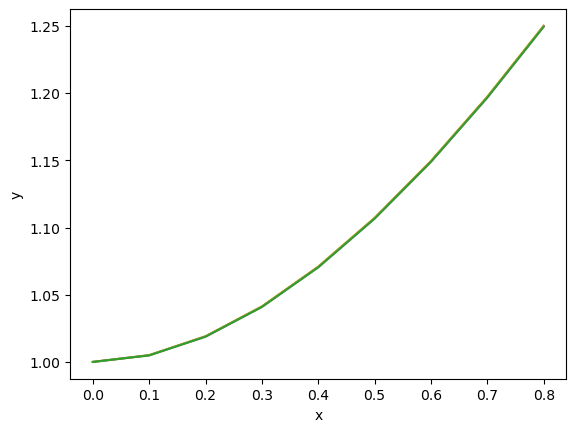

In [10]:
x = symp.symbols("x")
y = symp.symbols("y")
xlist1, ylist1 = ODE.Euler_ODE(-y + x + 1, [x, y], 0, 1, method="explicit")
xlist2, ylist2 = ODE.Euler_ODE(-y + x + 1, [x, y], 0, 1, step=8,method="estimate-corretion")
xlist3 = xlist2.copy()
ylist3 = [(x + symp.exp(-x)).subs({x: element}) for element in xlist3]

error1 = [np.abs(ylist3[i]-ylist1[i]) for i in range(len(xlist1))]
error2 = [np.abs(ylist3[i]-ylist2[i]) for i in range(len(xlist2))]

plt.plot(xlist1, ylist2)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

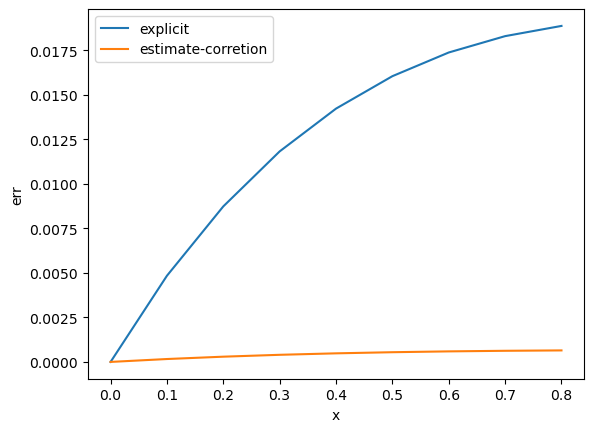

In [13]:
plt.plot(xlist1, error1, label="explicit")
plt.plot(xlist2, error2, label="estimate-corretion")
plt.xlabel(x)
plt.ylabel('err')
plt.legend()
plt.show()

2. 展开到2阶和四阶结果与严格解如下所示

xlist4, ylist4 = ODE.Euler